# Classification Algorithms

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fruits = pd.read_csv('fruits.csv')

In [3]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
fruits['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [7]:
fruits.shape

(59, 7)

In [6]:
fruits.groupby('fruit_name').size()

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64

In [8]:
import seaborn as sns

<Axes: xlabel='fruit_name', ylabel='count'>

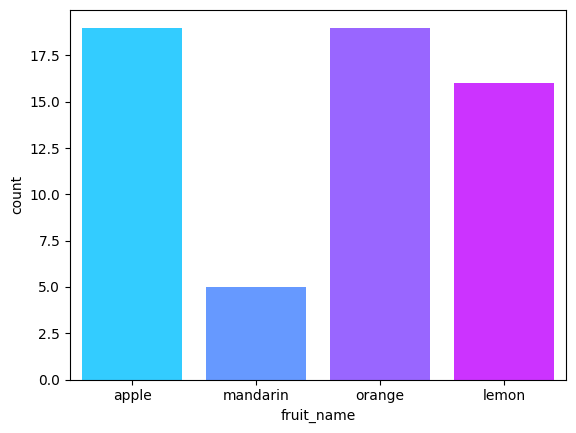

In [15]:
sns.countplot(x=fruits['fruit_name'], hue=fruits['fruit_name'], palette='cool', saturation=1)

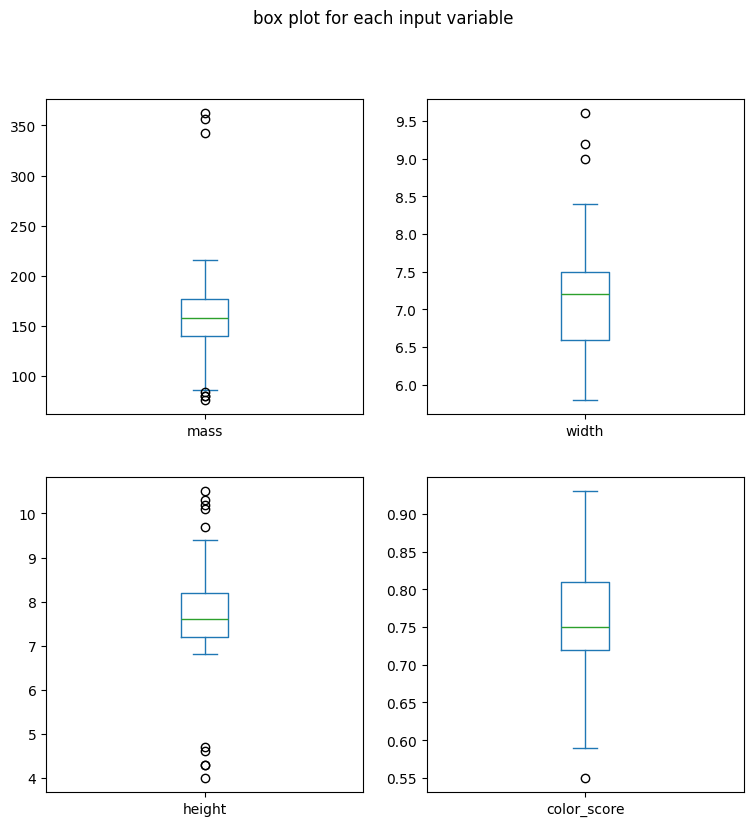

In [22]:
fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), title='box plot for each input variable')
plt.show()

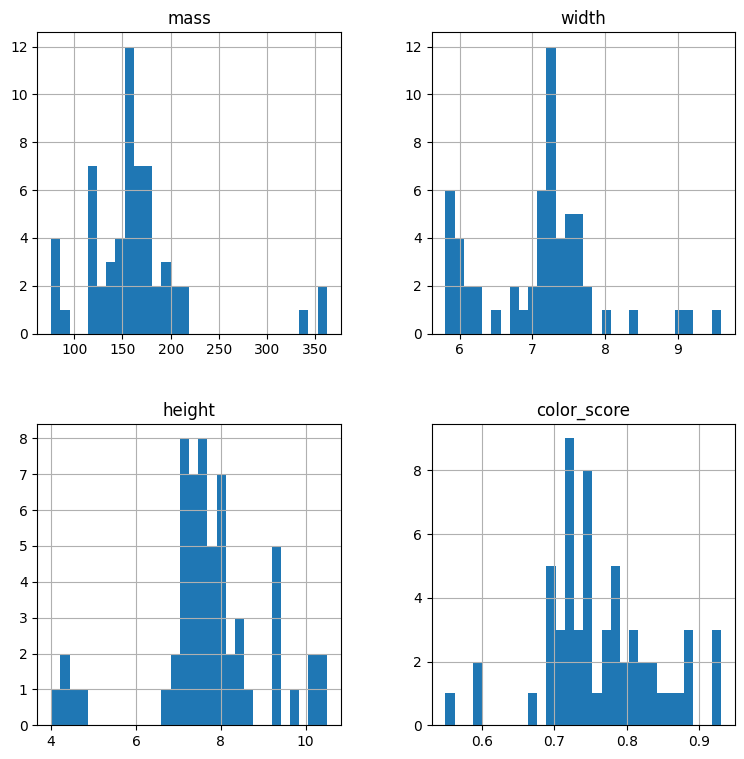

In [23]:
fruits.drop('fruit_label',axis=1).hist(bins=30, figsize=(9,9))
plt.show()

In [25]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

print(f'The Accuracy of Logistic Regression on training data set is {lr.score(X_train, y_train):.2f}')
print(f'The Accuracy of Logistic Regression on testing data set is {lr.score(X_test, y_test):.2f}')

The Accuracy of Logistic Regression on training data set is 0.75
The Accuracy of Logistic Regression on testing data set is 0.47


# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

print(f'The Accuracy of Decision Tree on training data set is {clf.score(X_train, y_train):.2f}')
print(f'The Accuracy of Decision Tree on testing data set is {clf.score(X_test, y_test):.2f}')

The Accuracy of Decision Tree on training data set is 1.00
The Accuracy of Decision Tree on testing data set is 0.87


# K-Nearest Neightbours Classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print(f'The Accuracy of k-nn classifier on training data set is {knn.score(X_train, y_train):.2f}')
print(f'The Accuracy of k-nn classifier on testing data set is {knn.score(X_test, y_test):.2f}')

The Accuracy of k-nn classifier on training data set is 0.95
The Accuracy of k-nn classifier on testing data set is 1.00


# Support Vector Machine (SVM)

In [40]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

print(f'The Accuracy of svm on training data set is {svm.score(X_train, y_train):.2f}')
print(f'The Accuracy of svm on testing data set is {svm.score(X_test, y_test):.2f}')

The Accuracy of svm on training data set is 0.91
The Accuracy of svm on testing data set is 0.80


# Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

print(f'The Accuracy of gnb on training data set is {gnb.score(X_train, y_train):.2f}')
print(f'The Accuracy of gnb on testing data set is {gnb.score(X_test, y_test):.2f}')

The Accuracy of gnb on training data set is 0.86
The Accuracy of gnb on testing data set is 0.67


# Confusion Matrix for KNN classifier

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

